In [27]:
import pandas as pd
import numpy as np
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
file_path= '../raw_data/clean-data.csv'

df= pd.read_csv(file_path)
df

[nltk_data] Downloading package punkt to C:\Users\luisl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\luisl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account
...,...,...
21067,After being a Chase Card customer for well ove...,Credit card or prepaid card+General-purpose cr...
21068,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card+General-purpose cr...
21069,I am not familiar with XXXX pay and did not un...,Checking or savings account+Checking account
21070,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card+General-purpose cr...


In [28]:
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ''
    
    # Remove sensitive info (e.g., XXX)
    text = re.sub(r'\bX+\b', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
    
    # Return the cleaned text as a single string
    return ' '.join(tokens)

df['cleaned_complaint'] = df['complaint_what_happened'].apply(clean_text)

In [29]:
df

,complaint_what_happened,ticket_classification,cleaned_complaint
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt,Good morning name appreciate could help put st...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...,upgraded card told agent upgrade anniversary d...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o...",Chase Card reported However fraudulent applica...
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o...",trying book ticket came across offer applied t...
4,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account,grand son give check deposit chase account fun...
...,...,...,...
21067,After being a Chase Card customer for well ove...,Credit card or prepaid card+General-purpose cr...,Chase Card customer well decade offered multip...
21068,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card+General-purpose cr...,Wednesday called Chas Visa Credit Card provide...
21069,I am not familiar with XXXX pay and did not un...,Checking or savings account+Checking account,familiar pay understand great risk provides co...
21070,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card+General-purpose cr...,flawless credit yrs Chase credit cards Chase F...


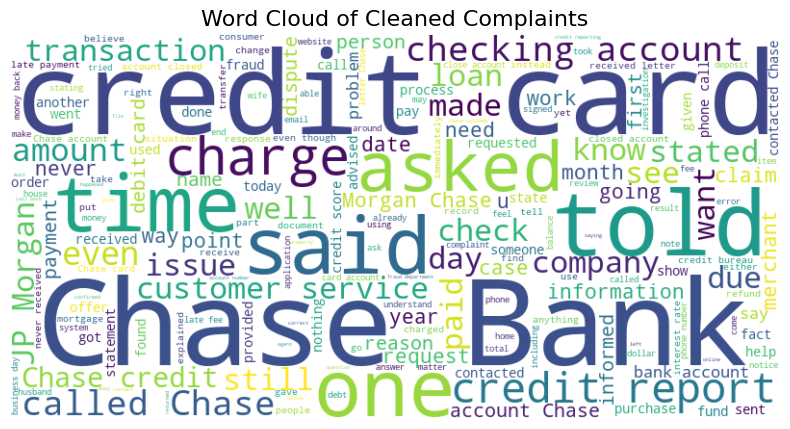

In [30]:
all_text = ' '.join(df['cleaned_complaint'].dropna())

wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',  
    max_words=200        
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud of Cleaned Complaints", fontsize=16)
plt.show()

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

X = df['cleaned_complaint'].dropna()  
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_vec = vectorizer.fit_transform(X)

num_topics = 5  
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X_vec)

LatentDirichletAllocation(n_components=5, random_state=42)

In [32]:
def display_topics(model, feature_names, num_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topics.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    return topics

In [33]:
top_words_per_topic = display_topics(lda_model, vectorizer.get_feature_names_out(), 10)
print("\n".join(top_words_per_topic))
doc_topic_distribution = lda_model.transform(X_vec)
df['predicted_topic'] = np.argmax(doc_topic_distribution, axis=1)

Topic 1: debt, chase, credit, account, reporting, report, payment, car, auto, information
Topic 2: credit, card, chase, account, report, balance, late, payment, inquiry, cards
Topic 3: loan, mortgage, chase, home, payment, payments, modification, property, foreclosure, bank
Topic 4: chase, card, dispute, charge, charges, credit, merchant, refund, received, purchase
Topic 5: account, chase, bank, check, money, funds, told, checking, called, card


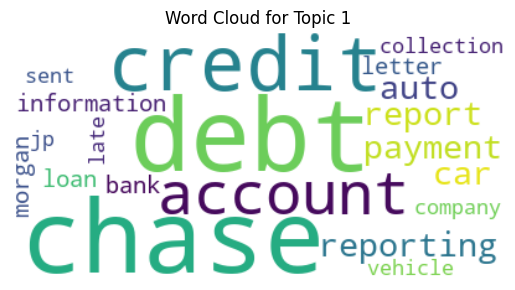

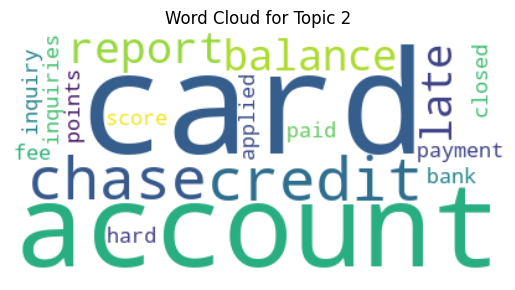

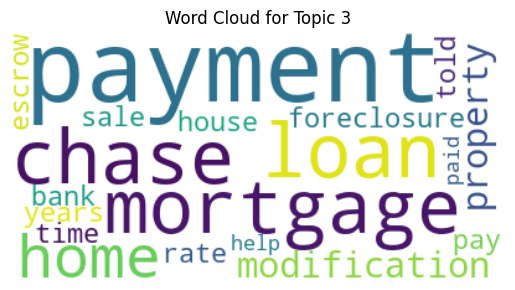

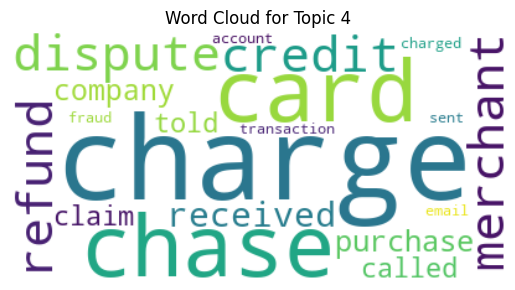

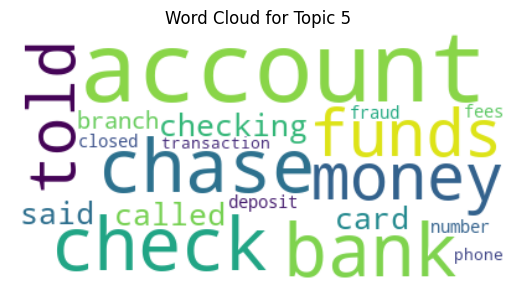

In [34]:
for topic_idx, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(background_color='white').generate(
        ' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-20 - 1:-1]])
    )
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic_idx + 1}")
    plt.show()

In [35]:
import json
output_path = '../raw_data/topics.json'

with open(output_path, 'w') as f:
    json.dump(top_words_per_topic, f, indent=4)

In [36]:
doc_topic_distribution = lda_model.transform(X_vec)
df['predicted_topic'] = np.argmax(doc_topic_distribution, axis=1)

def clean(text):
    if isinstance(text, str):
        return re.sub(r'[^a-zA-Z\s]', '', text) 
    return text

df['ticket_classification'] = df['ticket_classification'].apply(clean)
df['cleaned_complaint'] = df['cleaned_complaint'].apply(clean)
df = df.drop(columns=['complaint_what_happened'])
df


,ticket_classification,cleaned_complaint,predicted_topic
0,Debt collectionCredit card debt,Good morning name appreciate could help put st...,1
1,Credit card or prepaid cardGeneralpurpose cred...,upgraded card told agent upgrade anniversary d...,3
2,Credit reporting credit repair services or oth...,Chase Card reported However fraudulent applica...,1
3,Credit reporting credit repair services or oth...,trying book ticket came across offer applied t...,1
4,Checking or savings accountChecking account,grand son give check deposit chase account fun...,4
...,...,...,...
21067,Credit card or prepaid cardGeneralpurpose cred...,Chase Card customer well decade offered multip...,1
21068,Credit card or prepaid cardGeneralpurpose cred...,Wednesday called Chas Visa Credit Card provide...,3
21069,Checking or savings accountChecking account,familiar pay understand great risk provides co...,4
21070,Credit card or prepaid cardGeneralpurpose cred...,flawless credit yrs Chase credit cards Chase F...,1


In [ ]:
df.to_csv('../raw_data/final_df.csv', index=False)